### Barabassi-Albert model

The major idea is preferential attachment. In a network, new members are going to attach themselves to nodes that have high degree. In a social network this equates to people who are popular.

"The rich get richer".

#### Algorithm (loose version)

A new node has to attach itself to the network.

$ \Pi(k_i) $ is the probability of the new node will link to with node at $ i $, having degree $ k_i $.

Let $ m $ be the number of new edges added when a new edge joins a network.

$ \Pi(k_i) = \frac{k_i}{\sum_{j = 1}^m k_j} $

The probabilities of all $ k_i $, for each moment in the algorithm, will add up to $ 1 $.

$ \sum_{i=1}^n \Pi(k_i) = \large \frac{\sum_{i=1}^n k_i}{\sum_{j = 1}^m k_j} = \small 1$

There is a notion of time: a moment is when a new node is added. 

The algorithm is this:

- New node is to add $ m $ new edges to a newtork $ G $
- Starting with a random set of indexes $ \{i\} $ for all nodes in the network
- Form one new edge to the node $ G_i $ with probability $ \large \frac{k_i}{sum_{j=1}^n k_j} $
- Once $ m $ edges are added, then increment time (add another node)

This algorithm keeps iterating over all possible nodes in the network until the new node has degree $ k = m $

In [1]:
library("igraph")

m = 2;

edgeList = matrix(c(1,2), ncol=2, nrow=1)
g <- graph(edgeList, directed = FALSE);

edgesAdded <- m;


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
addNodes <- function(g,m){

    nodeCount = vcount(g);
    nodeIndexesRandom = sample(1:nodeCount);
    
    if(edgesAdded >= m) {
        edgesAdded <<- 0;
        g <- add_vertices(g, 1);
        nodeCount = nodeCount+1;
    }
    indexToAdd = nodeCount;

    edgeDegrees = degree(g);

    if(edgesAdded > 0) {
        nodeIndexesRandom = nodeIndexesRandom[nodeIndexesRandom != indexToAdd];
        edgeDegrees = edgeDegrees[-indexToAdd];
    }
    
    nodeIndexesWithoutEdge = c()
    for(index in nodeIndexesRandom) {
        if(!are.connected(g, indexToAdd, index)) {
            nodeIndexesWithoutEdge = c(nodeIndexesWithoutEdge, index);
        }
    }
        
    for(index in nodeIndexesWithoutEdge) {
        #print(sprintf("Considering edge %d->%d", indexToAdd, index))
        edgeProbability = edgeDegrees[index]/sum(edgeDegrees);
        #print(sprintf("Probability to add %f", edgeProbability))
        toAddTrial <- runif(n=1, min=0, max=1);
        if (toAddTrial <= edgeProbability) {
            #print("Adding")
            g <- add_edges(g, c(indexToAdd, index));
            edgesAdded <<- edgesAdded + 1;
        } else {
            #print("Not adding")
        }
        
        if (edgesAdded >= m || nodeCount < m) {
            break;
        }
    }
    
    (g)
}

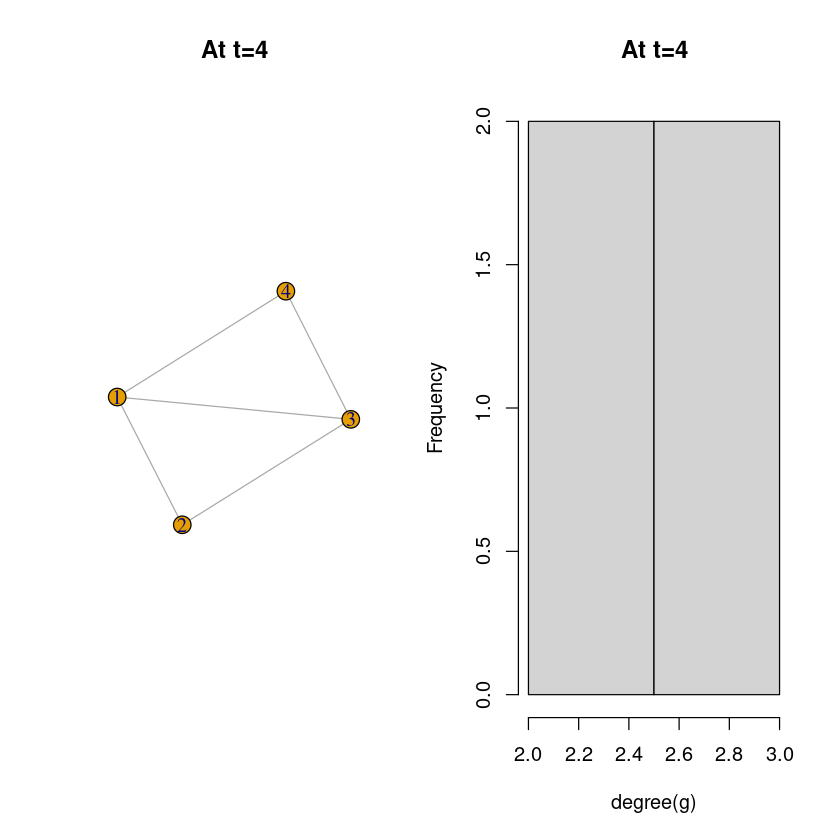

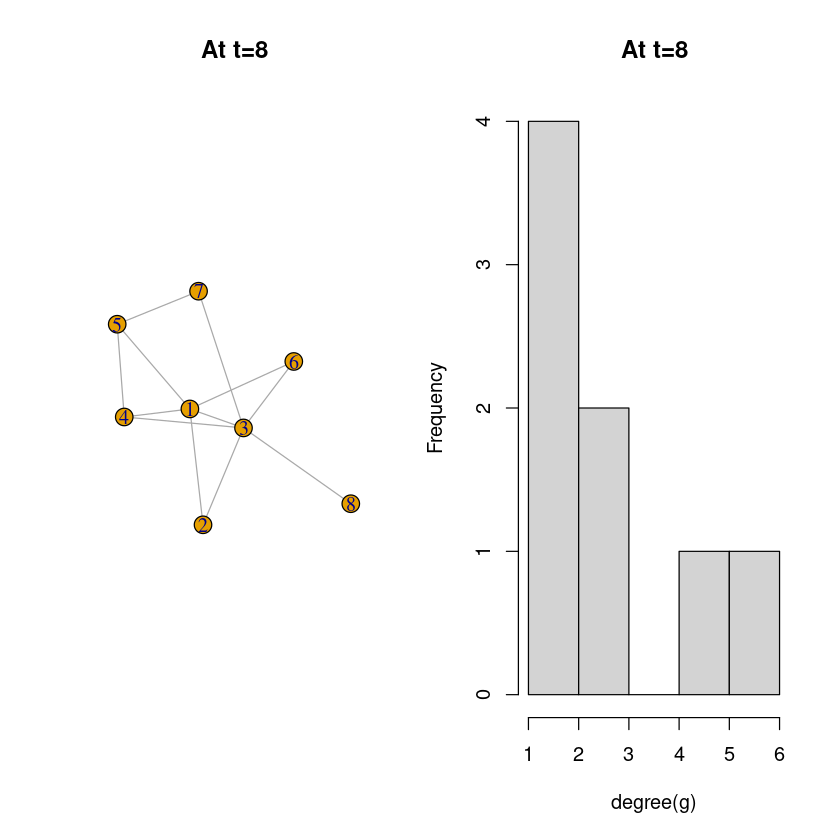

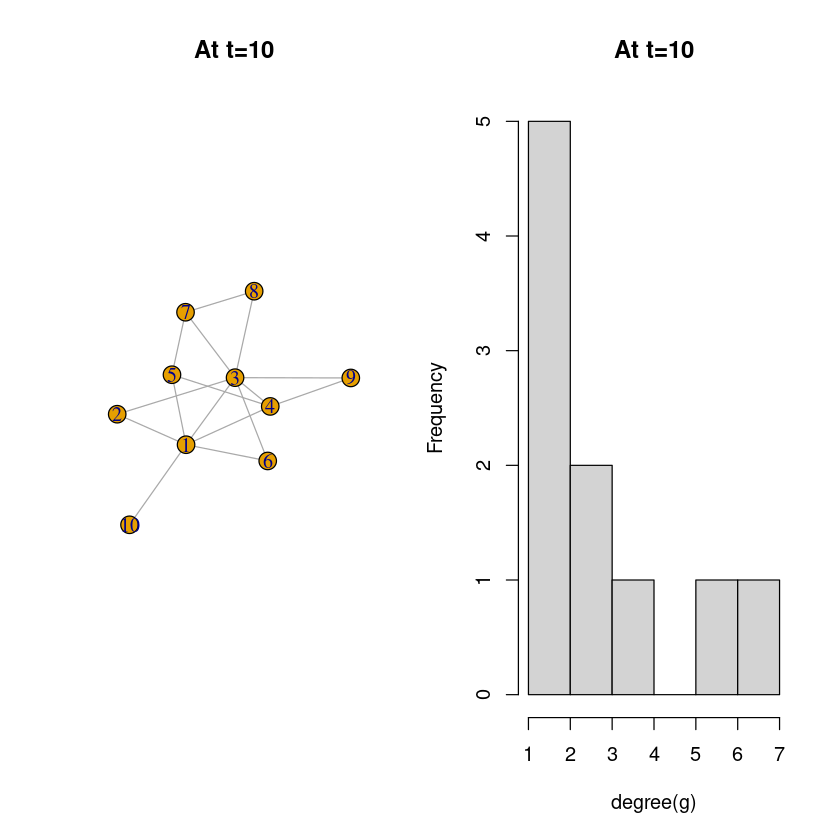

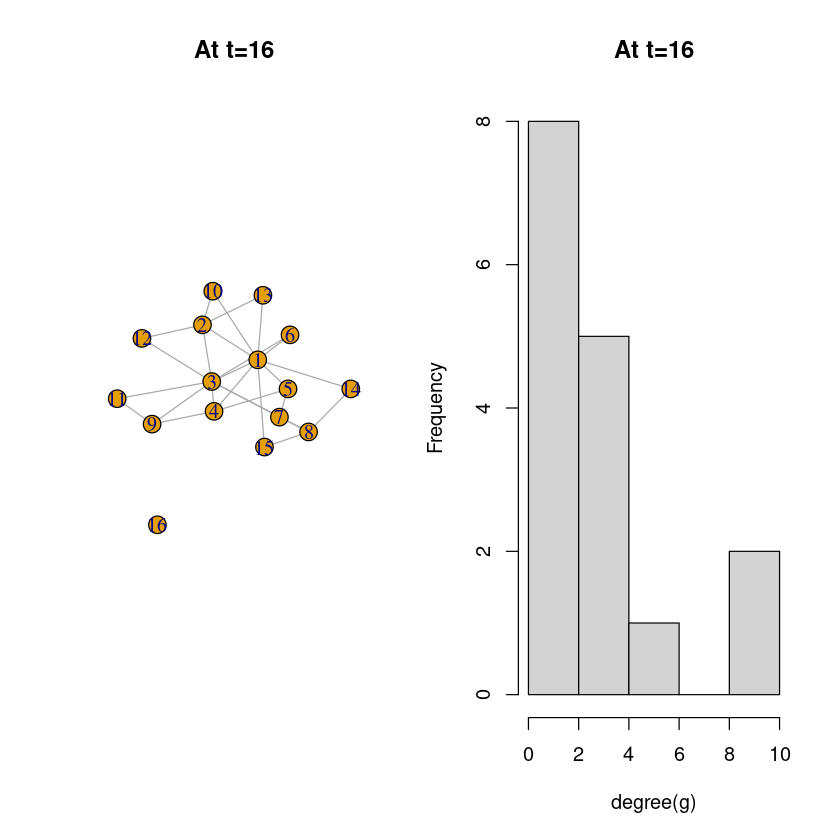

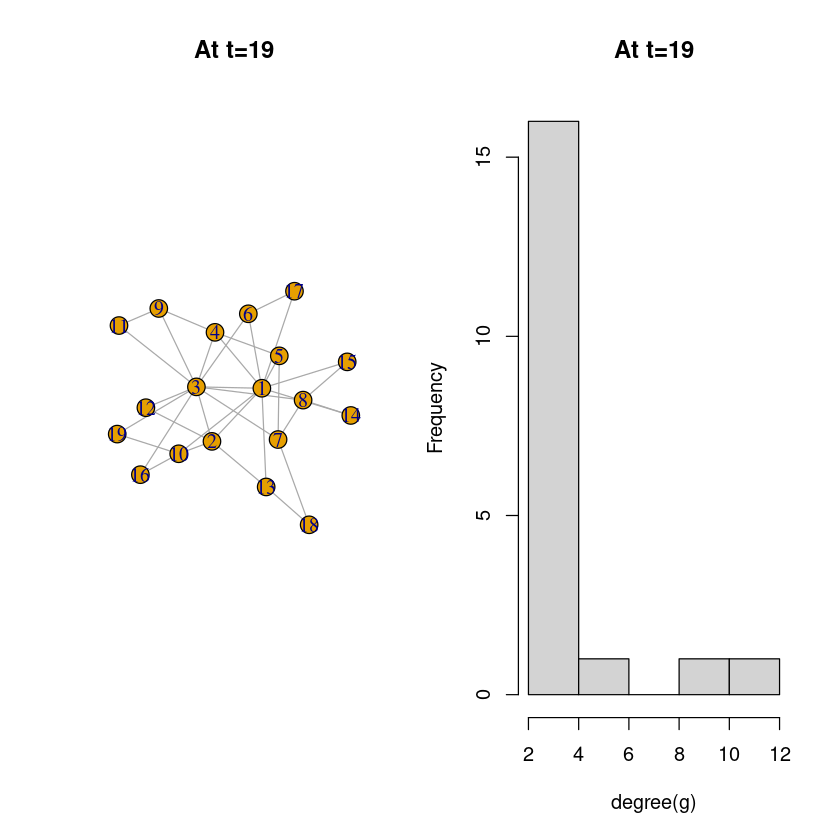

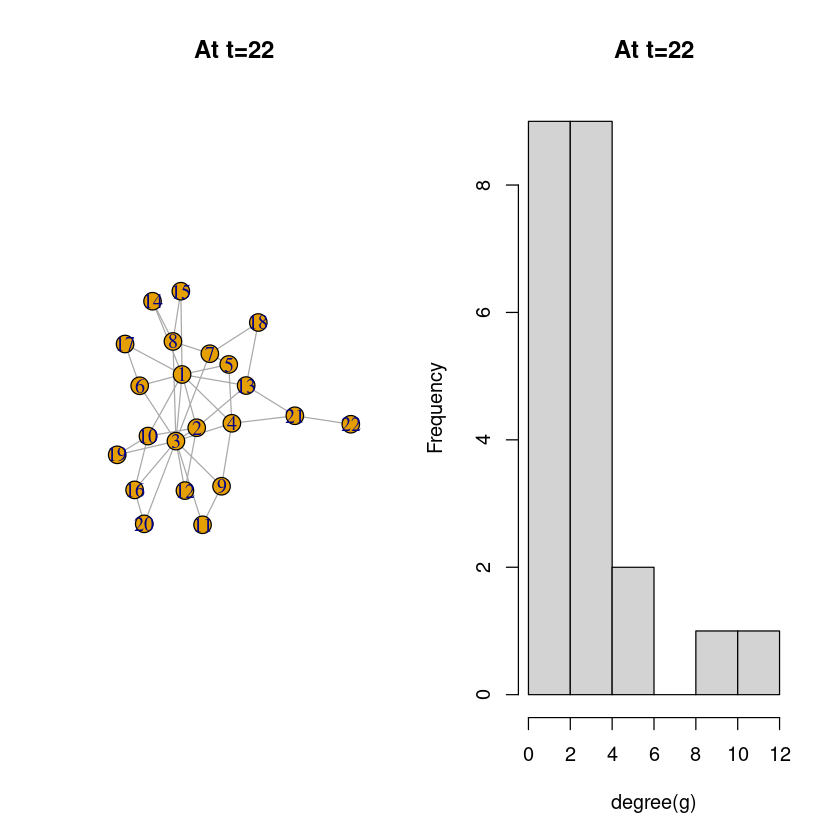

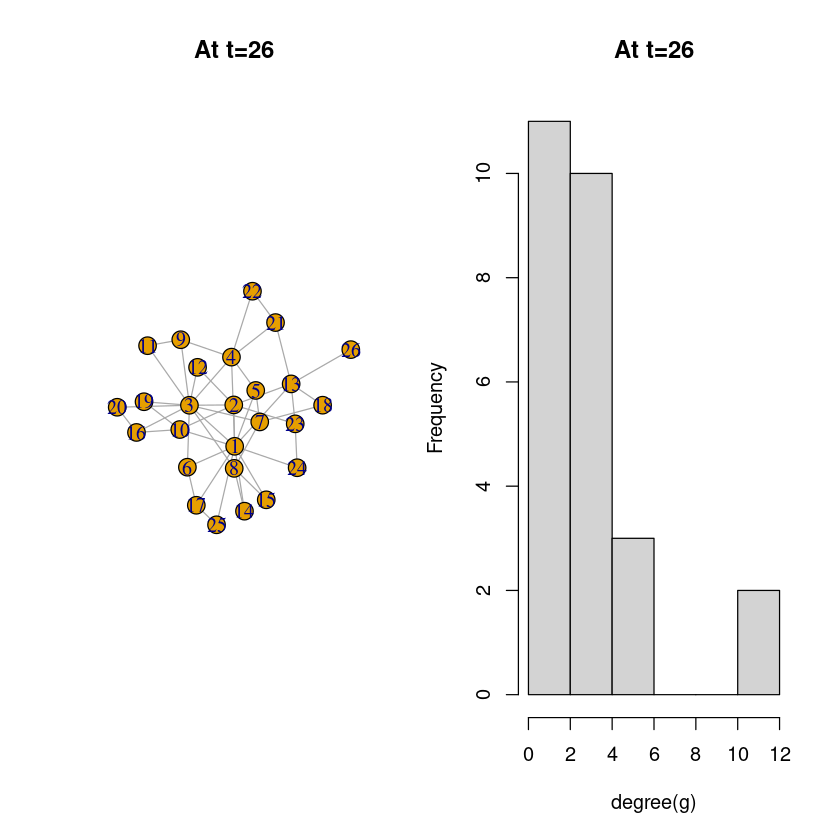

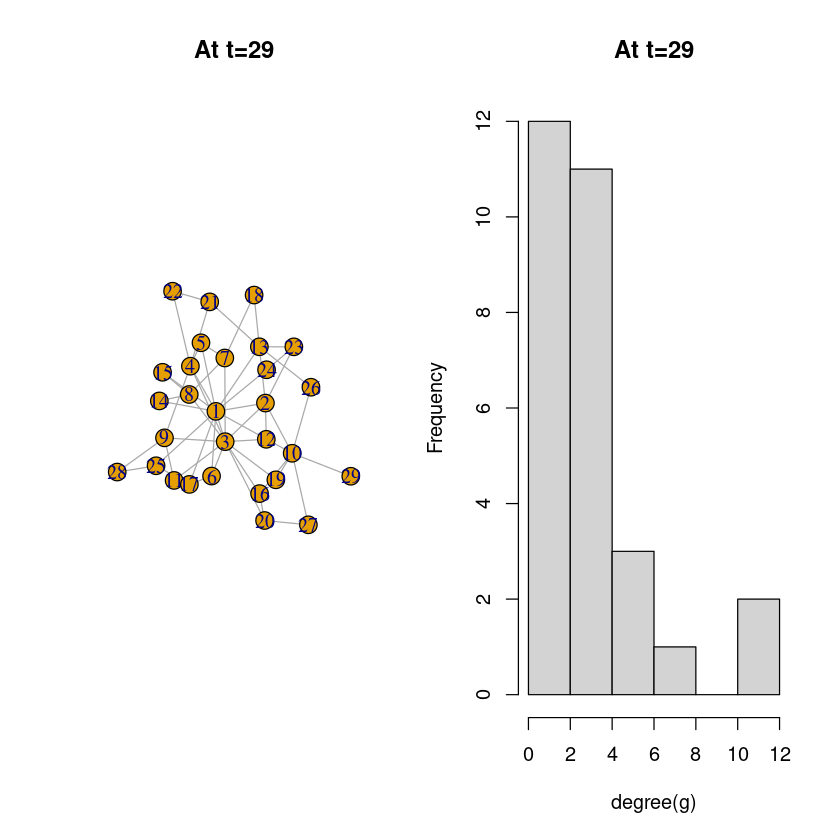

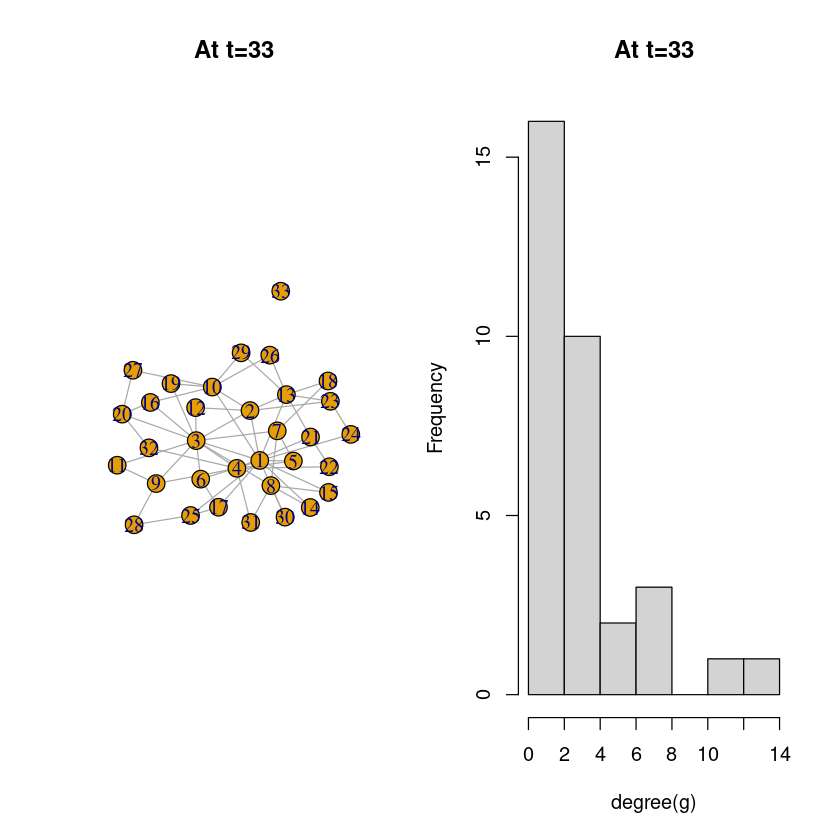

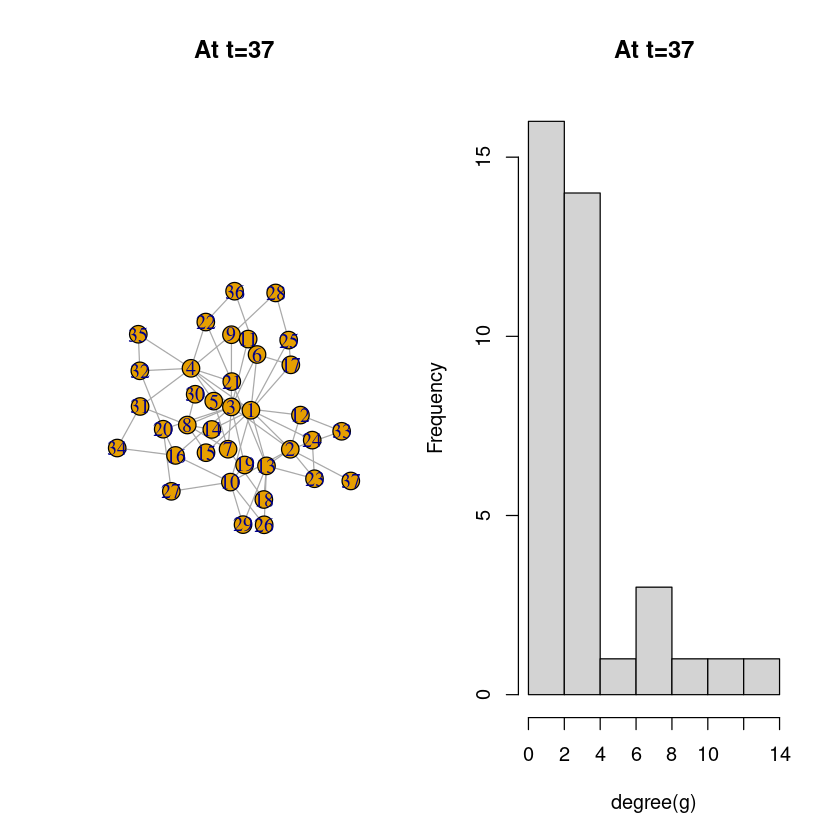

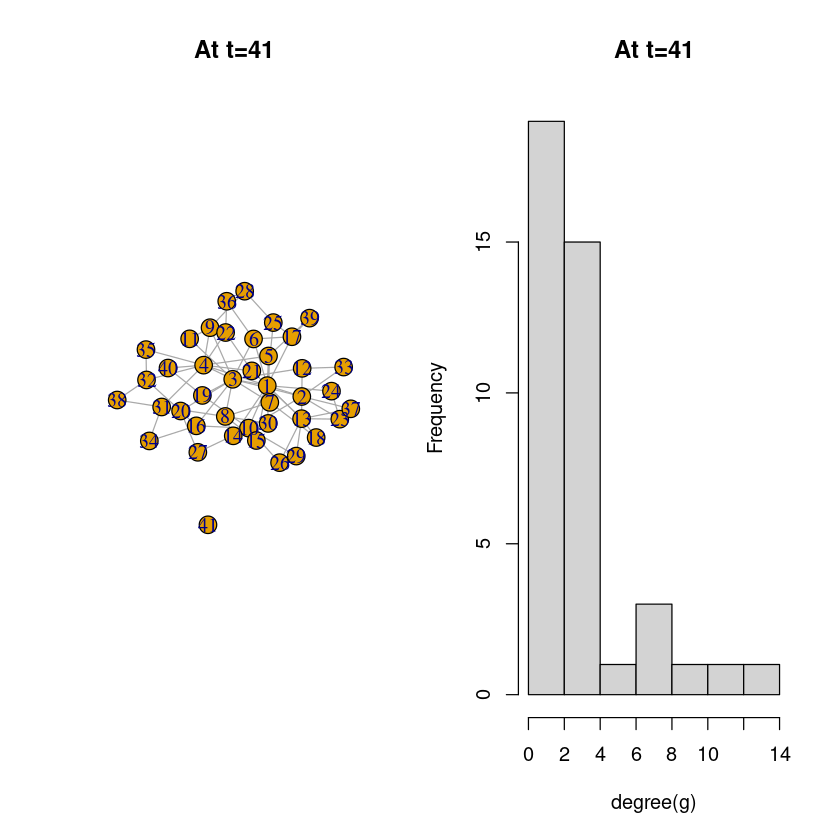

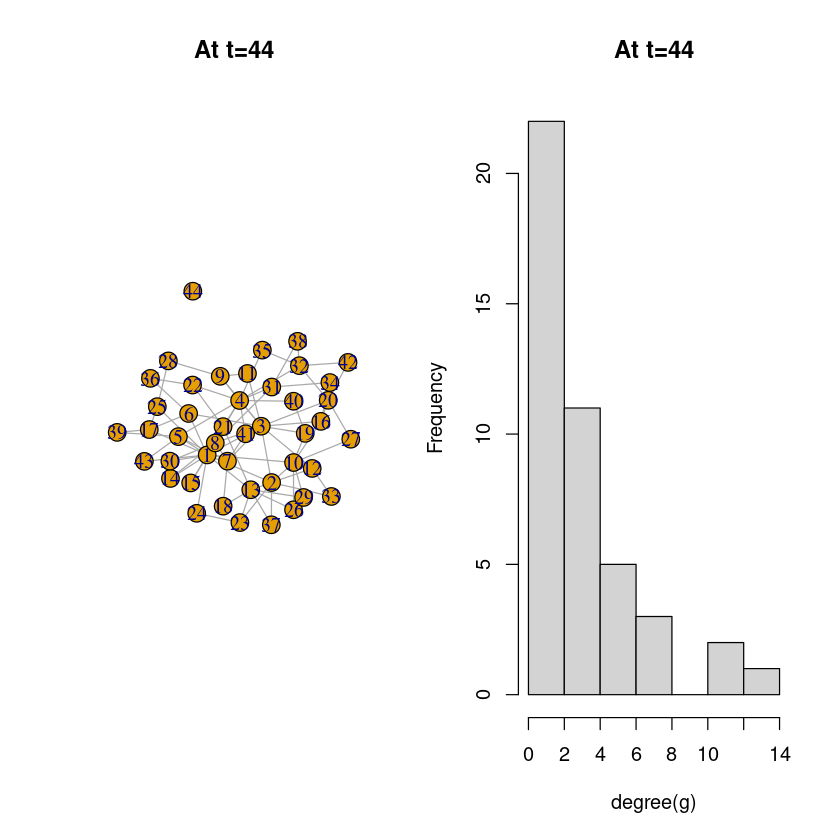

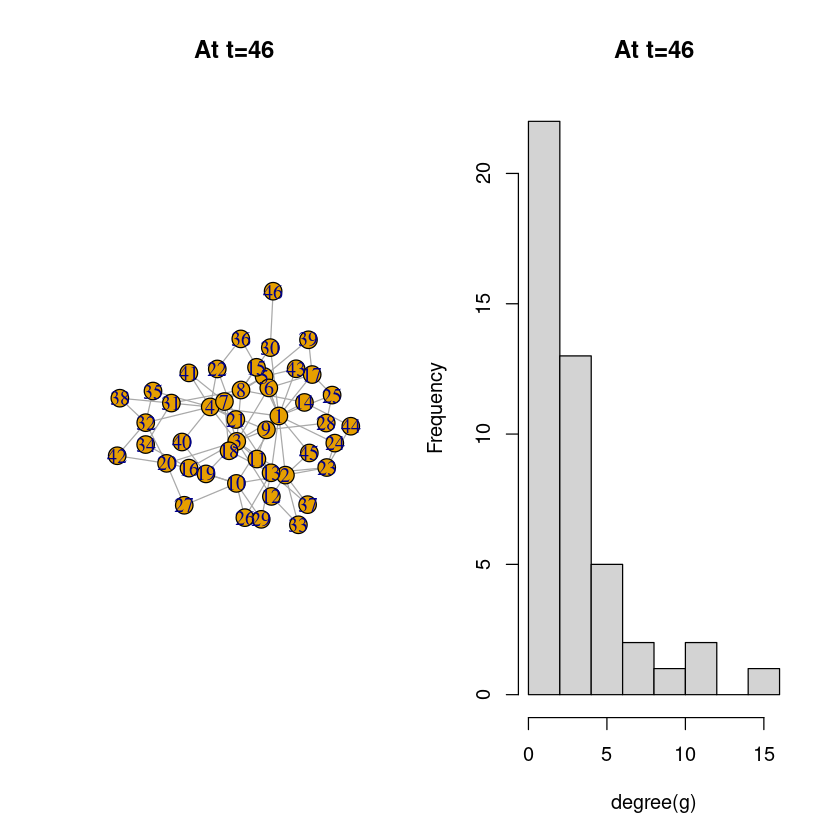

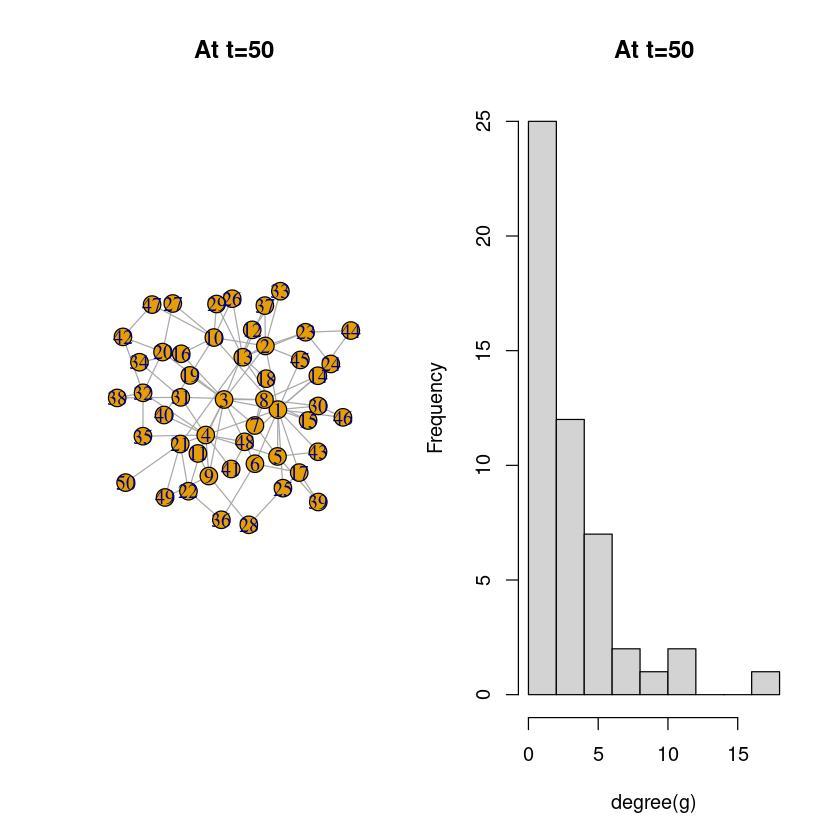

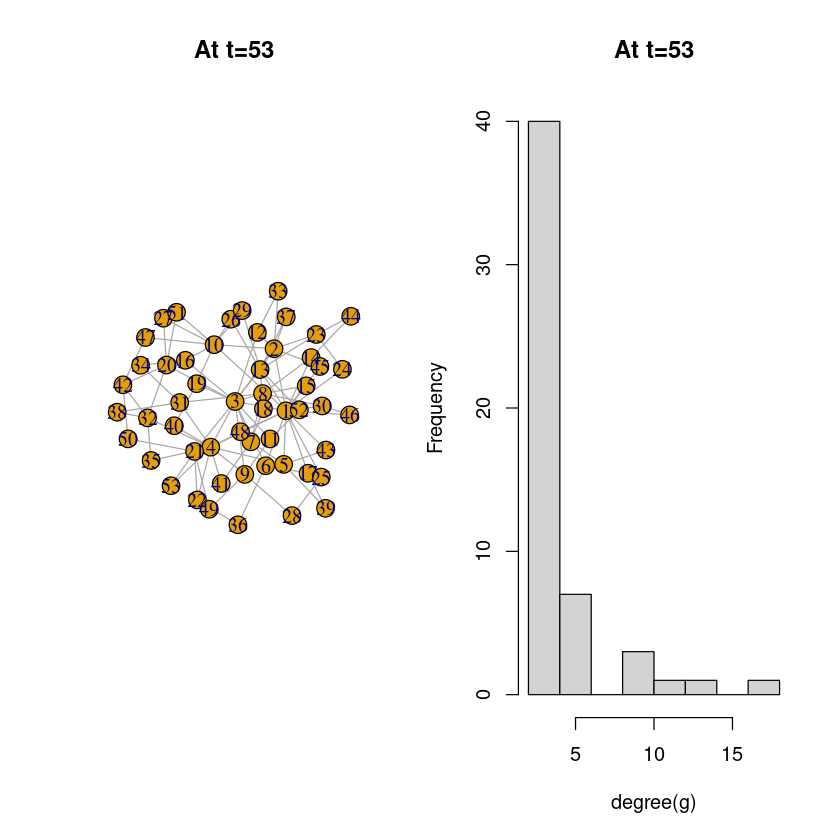

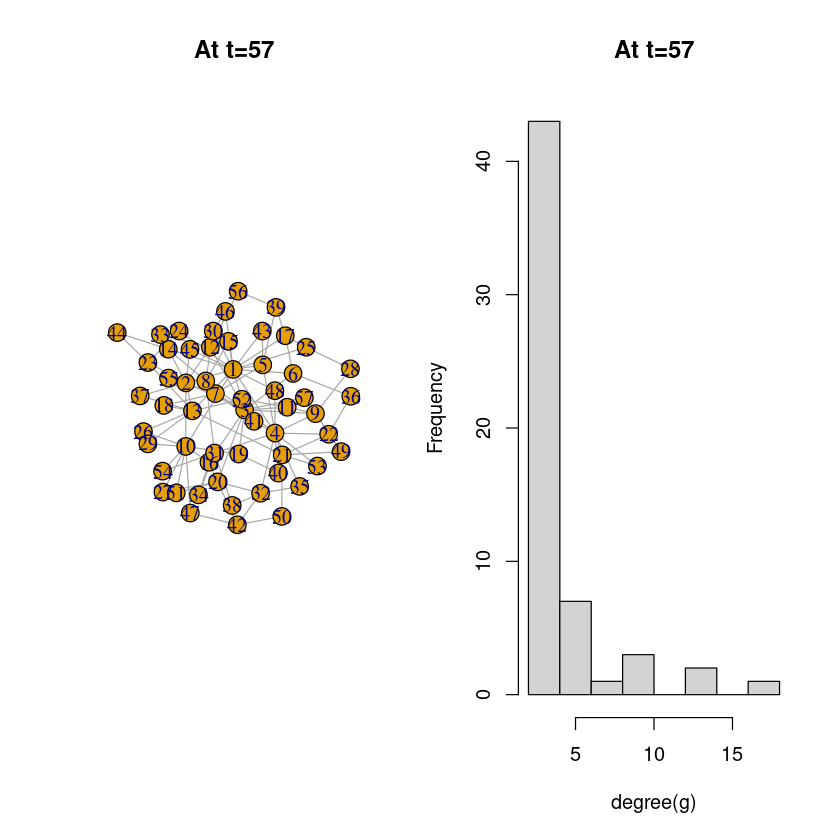

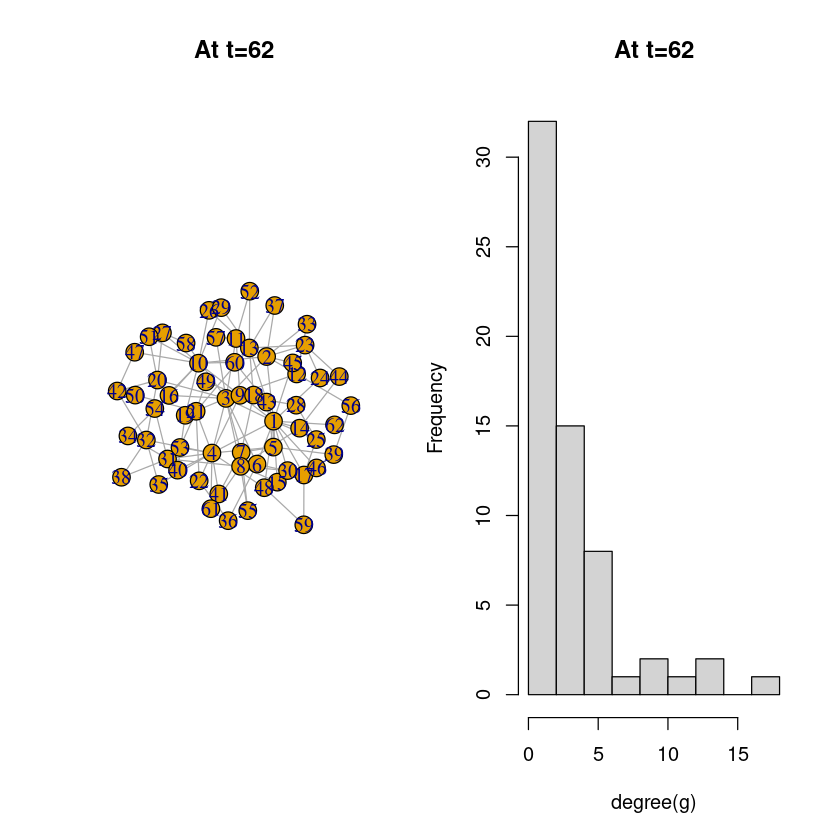

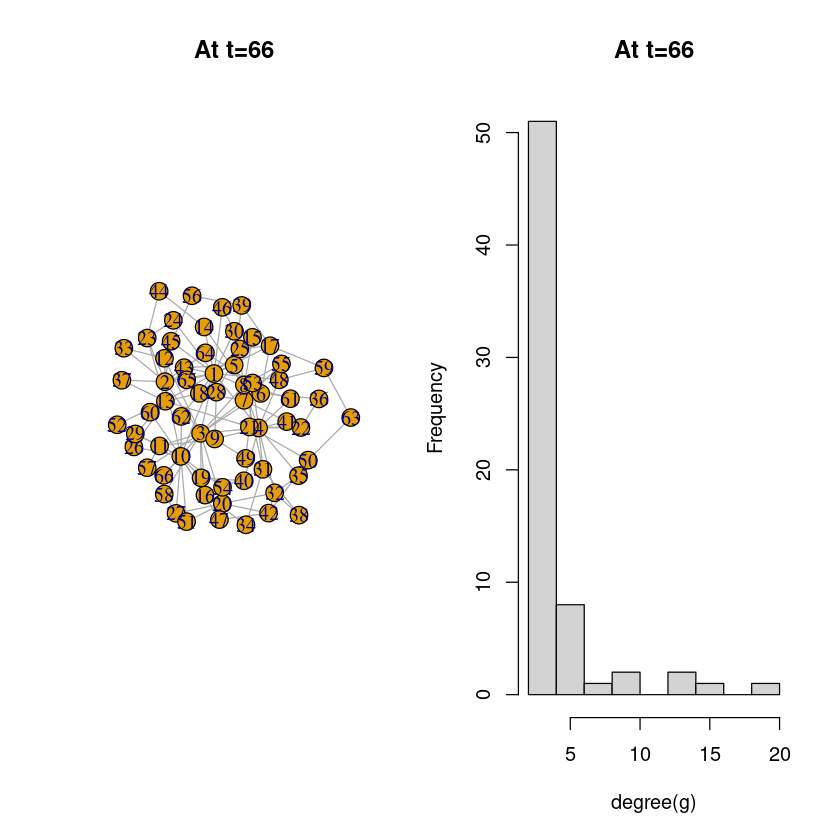

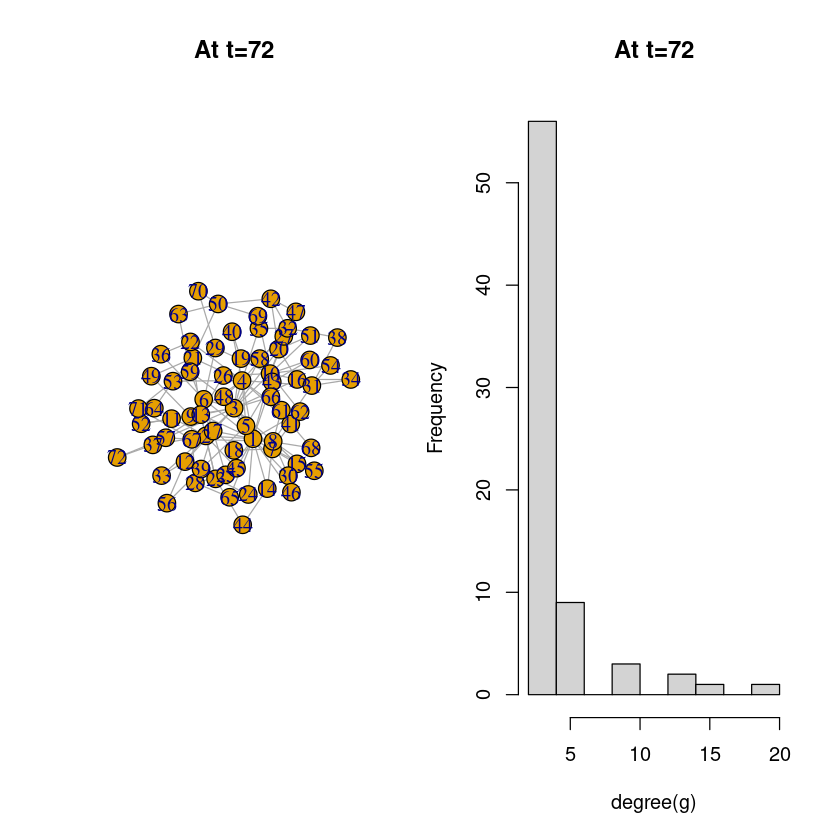

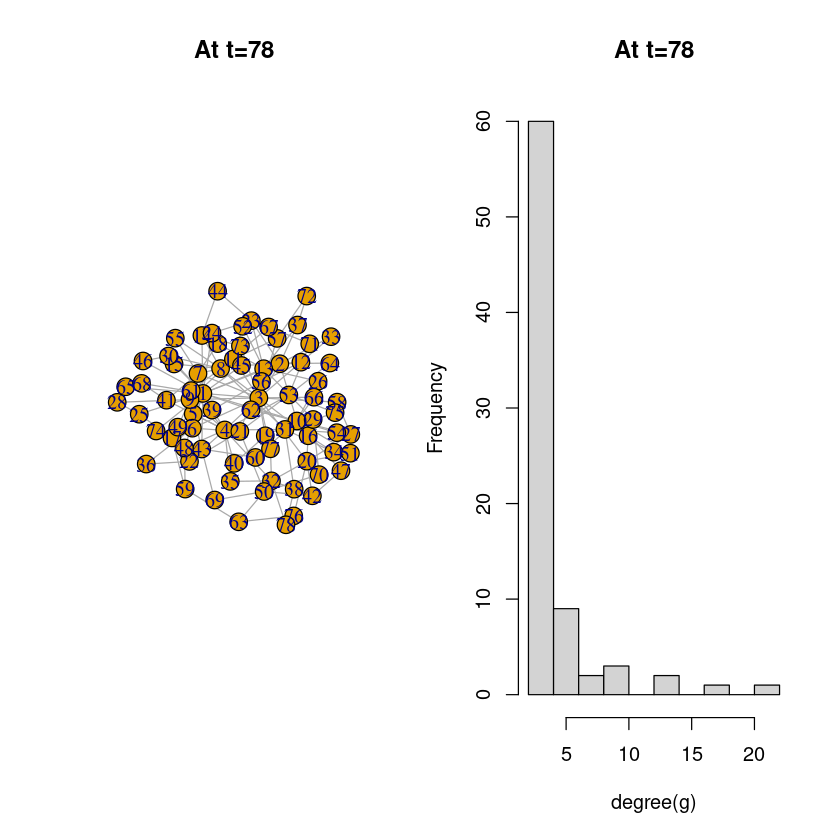

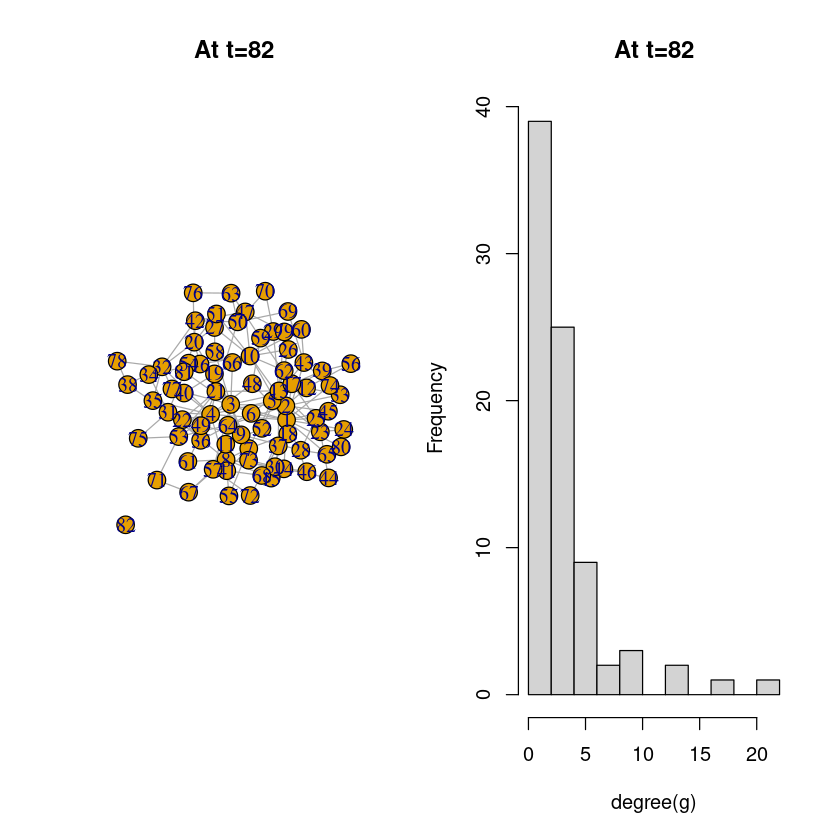

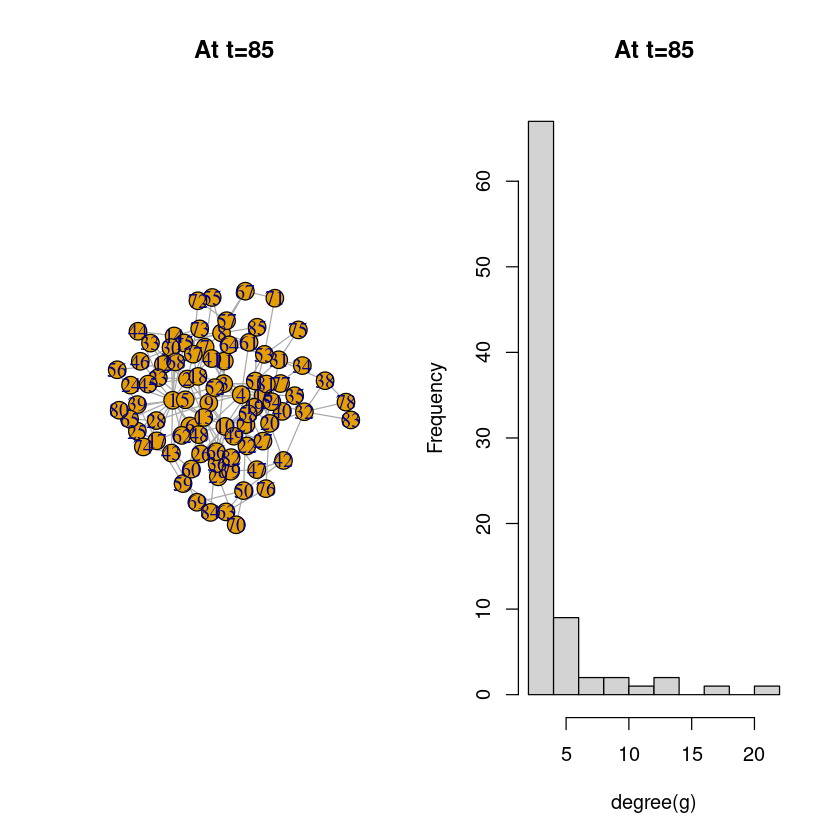

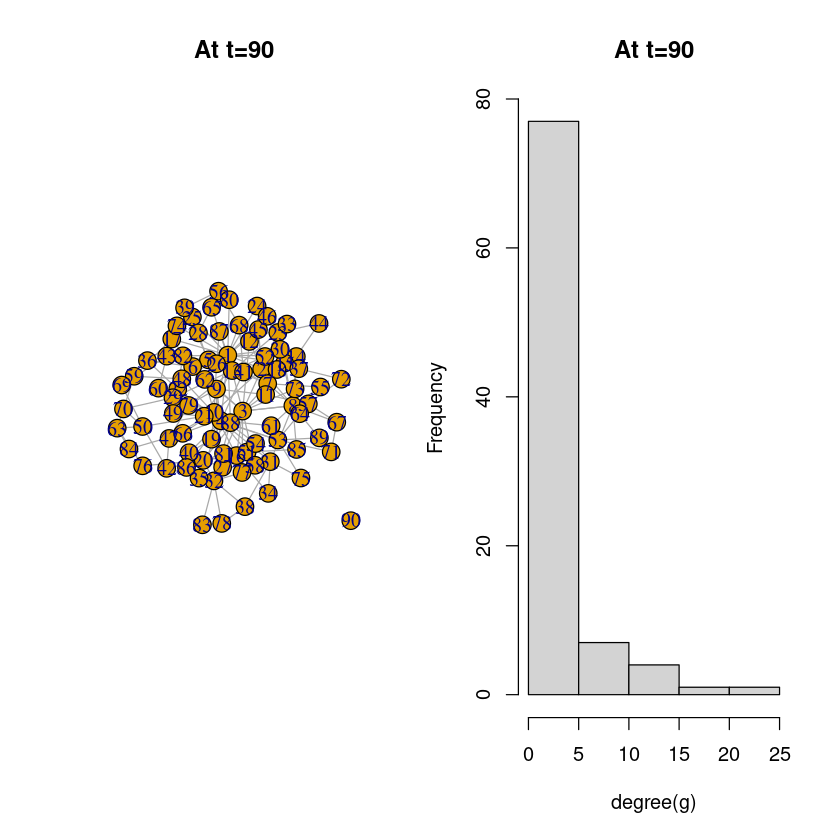

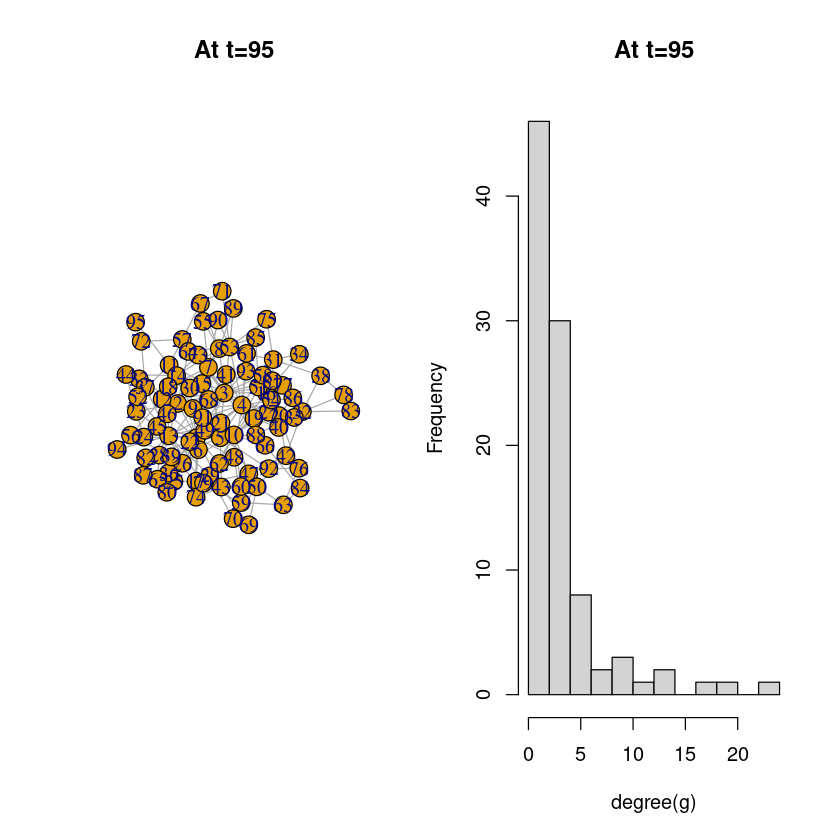

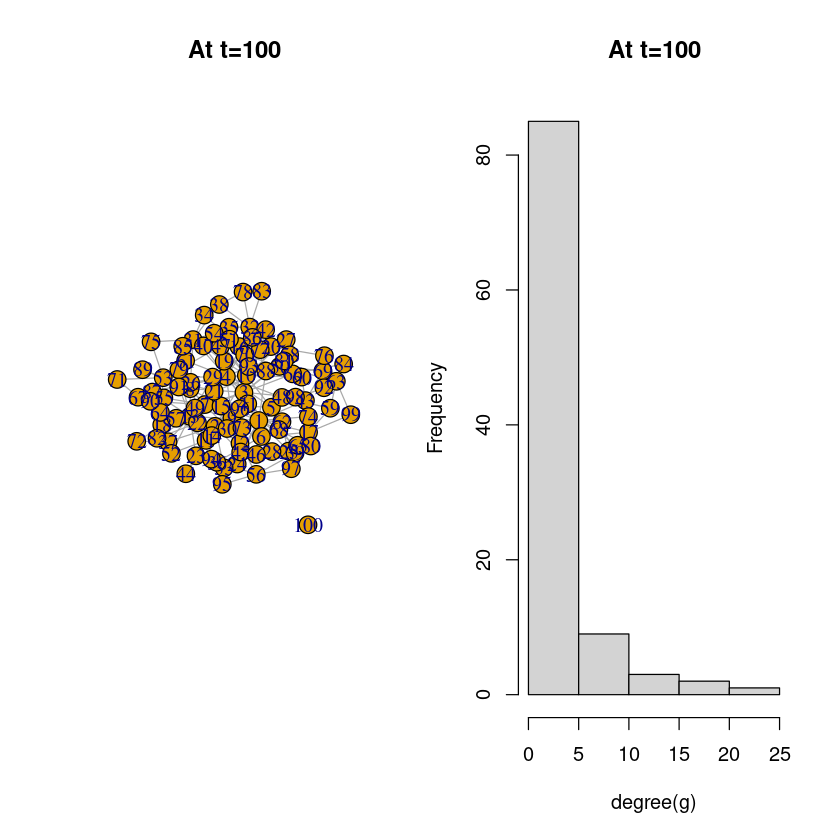

In [3]:
tPeriods=10;
attemptsToAddNodes = 10;
while (vcount(g) < tPeriods*attemptsToAddNodes) {
    for (t in 1:attemptsToAddNodes) {
        g = addNodes(g, m);
    }
    par(mfrow = c(1, 2));
    nodeCount = vcount(g)
    plot(g, main=sprintf("At t=%d", nodeCount));
    hist(degree(g), main=sprintf("At t=%d", nodeCount));
}

### Origins of preferential attachment

#### Link selection

If a new node chooses a random edge, and then selects one that is connected to that edge, then you will expect the more-popular nodes (with higher degree distributions) to be picked more often than nodes that don't already have 

#### Copying model

A new node joins a network, and looks at another node. The new node copies the links of the existing node.

#### The good get richer (rather than the rich get richer)

For every pair of nodes, we decide on the fitness, and then decide to have an edge between them or not.

If your fitness values come from a scale-free distribution then you end up with a scale-free network. Even without a scale-free distribution, you can get a scale-free network.

For example, if you use the Poisson Distribution to generate your threshold value then you get a scale-free distribution.